# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
data = pd.read_csv('loan_default_prediction_project.csv')
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66


In [3]:
data.tail()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
995,22,Female,98081.105862,Unemployed,Urban,727,0.961613,3586.586891,Non-Default,41473.241896,3.700707,23
996,40,Male,30044.017181,Employed,Rural,416,0.775082,32993.493341,Default,48942.588814,12.932559,62
997,27,Female,21355.813191,Unemployed,Rural,806,0.621937,21579.216456,Default,34010.252873,3.825633,55
998,61,Female,81612.656941,NaN,Rural,845,0.606793,38180.153354,Default,17504.010506,13.263354,27
999,19,Male,84572.442989,Unemployed,Suburban,624,0.849470,49629.885929,Non-Default,49850.267385,16.606985,49


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 792 non-null    object 
 2   Income                 1000 non-null   float64
 3   Employment_Status      906 non-null    object 
 4   Location               1000 non-null   object 
 5   Credit_Score           1000 non-null   int64  
 6   Debt_to_Income_Ratio   1000 non-null   float64
 7   Existing_Loan_Balance  1000 non-null   float64
 8   Loan_Status            1000 non-null   object 
 9   Loan_Amount            1000 non-null   float64
 10  Interest_Rate          1000 non-null   float64
 11  Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 93.9+ KB


In [5]:
data.shape

(1000, 12)

In [6]:
data.dtypes

Age                        int64
Gender                    object
Income                   float64
Employment_Status         object
Location                  object
Credit_Score               int64
Debt_to_Income_Ratio     float64
Existing_Loan_Balance    float64
Loan_Status               object
Loan_Amount              float64
Interest_Rate            float64
Loan_Duration_Months       int64
dtype: object

# Statistical Analysis

In [7]:
data.describe()

,Age,Income,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,60705.291386,571.094000,0.485502,25239.656186,27636.369345,11.538267,42.221000
std,13.497852,24594.030383,163.395983,0.296466,14202.689890,12925.200961,4.883342,17.116867
min,18.000000,20010.775440,250.000000,0.000628,80.059377,5060.998602,3.003148,12.000000
25%,29.000000,40820.367273,429.000000,0.220606,13597.494593,16756.405848,7.483547,27.000000
50%,42.000000,60547.119929,567.000000,0.483633,25439.429898,27938.066858,11.537942,42.000000
75%,52.000000,80338.552791,720.250000,0.735476,37305.466739,39151.564233,15.499129,57.000000
max,64.000000,150000.000000,849.000000,0.999849,49987.578171,49986.843702,19.991438,71.000000


# rounding the data values to two deciaml

In [8]:
numerical_column = data.select_dtypes(include=['int64','float64'])
print(numerical_column.head())

# rounding data
numerical_column['Income'] = round(numerical_column['Income'],2)
numerical_column['Debt_to_Income_Ratio'] = round(numerical_column['Debt_to_Income_Ratio'],3)
numerical_column['Existing_Loan_Balance'] = round(numerical_column['Existing_Loan_Balance'],2)
numerical_column['Loan_Amount'] = round(numerical_column['Loan_Amount'],2)
numerical_column['Interest_Rate'] = round(numerical_column['Interest_Rate'],1)

print("----------------------------------------------------------------")
print("After rounding the data:")
print(numerical_column.head())

   Age        Income  Credit_Score  Debt_to_Income_Ratio  \
0   56  71266.105175           639              0.007142   
1   46  37283.054601           474              0.456731   
2   32  69567.036392           750              0.329231   
3   60  72016.087392           435              0.052482   
4   25  32161.988250           315              0.450236   

   Existing_Loan_Balance   Loan_Amount  Interest_Rate  Loan_Duration_Months  
0           27060.188289  13068.330587      18.185533                    59  
1           40192.994312  15159.338369      11.727471                    69  
2           25444.262759   6131.287659      17.030462                    69  
3            3122.213749  37531.880251      16.868949                    26  
4           19197.350445  41466.397989      18.891582                    66  
----------------------------------------------------------------
After rounding the data:
   Age    Income  Credit_Score  Debt_to_Income_Ratio  Existing_Loan_Balance  \
0 

In [9]:
data['Income'] = numerical_column['Income']
data['Debt_to_Income_Ratio'] = numerical_column['Debt_to_Income_Ratio']
data['Existing_Loan_Balance'] = numerical_column['Existing_Loan_Balance']
data['Loan_Amount'] = numerical_column['Loan_Amount']
data['Interest_Rate'] = numerical_column['Interest_Rate']
#printing
data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.11,Employed,Suburban,639,0.007,27060.19,Non-Default,13068.33,18.2,59
1,46,NaN,37283.05,Employed,Suburban,474,0.457,40192.99,Default,15159.34,11.7,69
2,32,Male,69567.04,Employed,Urban,750,0.329,25444.26,Default,6131.29,17.0,69
3,60,Female,72016.09,Employed,Rural,435,0.052,3122.21,Non-Default,37531.88,16.9,26
4,25,Female,32161.99,Unemployed,Suburban,315,0.450,19197.35,Non-Default,41466.40,18.9,66


# Univariate Analysis

Text(0, 0.5, 'Frequency')

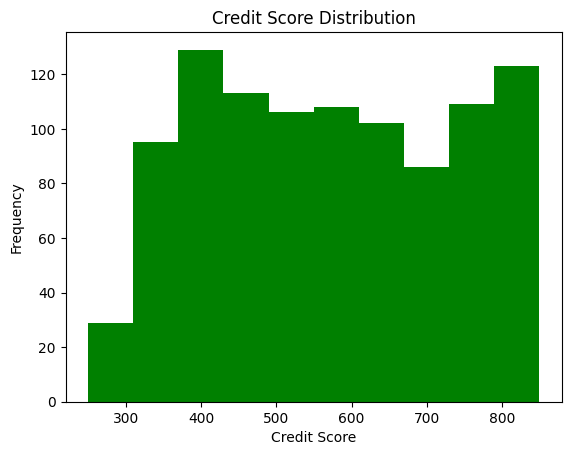

In [10]:
plt.hist(data['Credit_Score'],color='Green')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'ratio of Loan Status')

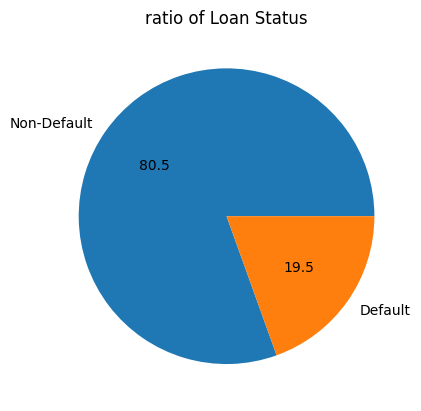

In [11]:
info = data['Loan_Status'].unique()
values = data['Loan_Status'].value_counts()
values
plt.pie(values,labels=info,autopct='%0.1f')
plt.title('ratio of Loan Status')

Text(0, 0.5, 'Frequency')

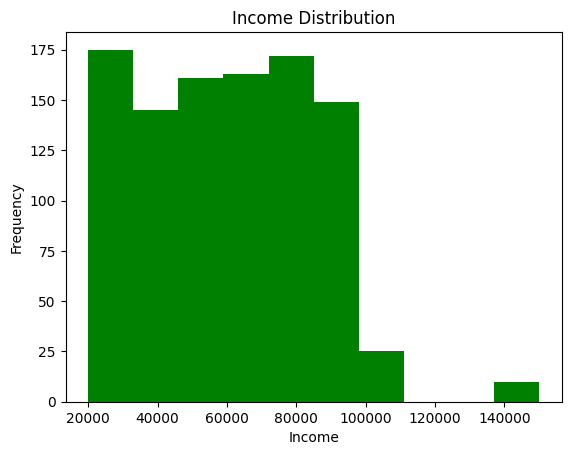

In [12]:
plt.hist(data['Income'],color='green')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Location Distribution')

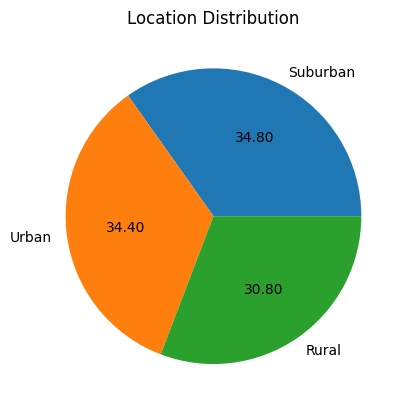

In [13]:
value = data['Location'].value_counts()
label = data['Location'].unique()

plt.pie(value,labels = label,autopct="%.2f")
plt.title('Location Distribution')

# Bivariate Analysis

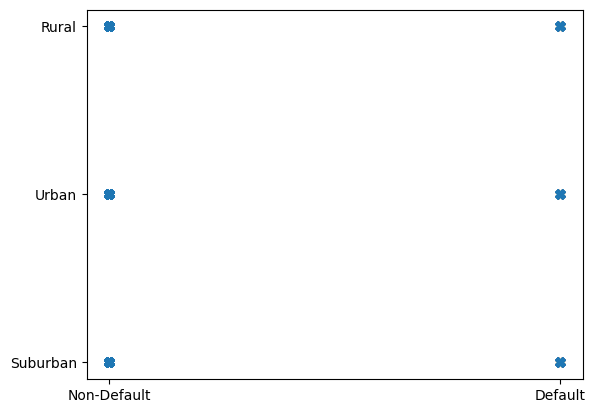

In [14]:
plt.scatter(data['Loan_Status'],data['Location'], marker='X')

<BarContainer object of 1000 artists>

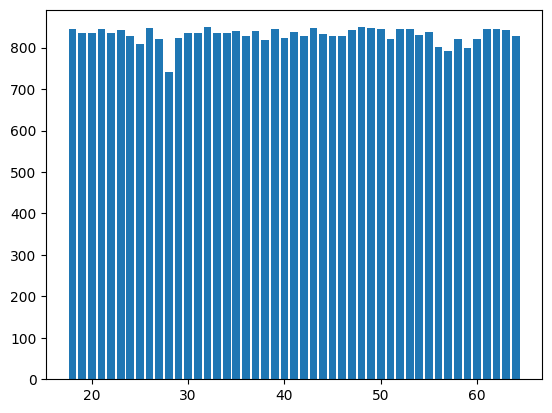

In [15]:
plt.bar(data['Age'],data['Credit_Score'])

# multivaraite Analysis

<Axes: >

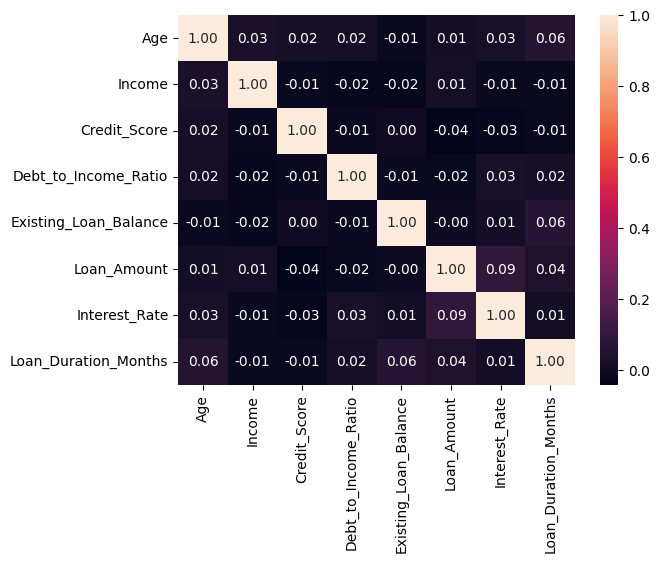

In [16]:
corr = numerical_column.corr()
sns.heatmap(corr, annot= True, fmt=".2f")

# finding null values

In [17]:
data.isnull().any()

Age                      False
Gender                    True
Income                   False
Employment_Status         True
Location                 False
Credit_Score             False
Debt_to_Income_Ratio     False
Existing_Loan_Balance    False
Loan_Status              False
Loan_Amount              False
Interest_Rate            False
Loan_Duration_Months     False
dtype: bool

In [18]:
data.isnull().sum()

Age                        0
Gender                   208
Income                     0
Employment_Status         94
Location                   0
Credit_Score               0
Debt_to_Income_Ratio       0
Existing_Loan_Balance      0
Loan_Status                0
Loan_Amount                0
Interest_Rate              0
Loan_Duration_Months       0
dtype: int64

## Gender Column

In [19]:
data['Gender'].value_counts()

Gender
Female    399
Male      393
Name: count, dtype: int64

In [20]:
gender_value = data['Gender'].mode()
print(gender_value)

0    Female
Name: Gender, dtype: object


### Filling missing Value

In [21]:
data['Gender'] = data['Gender'].fillna(value='Female')

In [22]:
data['Gender'].isnull().sum()

0

## Employment Status

In [23]:
data['Employment_Status'].value_counts()

Employment_Status
Employed      596
Unemployed    310
Name: count, dtype: int64

In [24]:
data['Employment_Status'].unique()

array(['Employed', 'Unemployed', nan], dtype=object)

In [25]:
data['Employment_Status'] = data['Employment_Status'].fillna(value='Employed')

In [26]:
data.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

# Outlier detection

In [27]:
print(numerical_column.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Income                 1000 non-null   float64
 2   Credit_Score           1000 non-null   int64  
 3   Debt_to_Income_Ratio   1000 non-null   float64
 4   Existing_Loan_Balance  1000 non-null   float64
 5   Loan_Amount            1000 non-null   float64
 6   Interest_Rate          1000 non-null   float64
 7   Loan_Duration_Months   1000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 62.6 KB
None


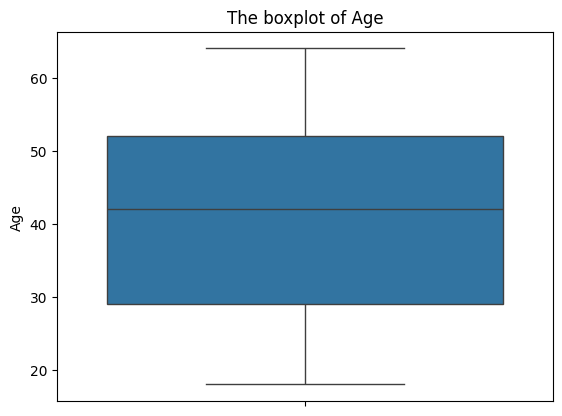

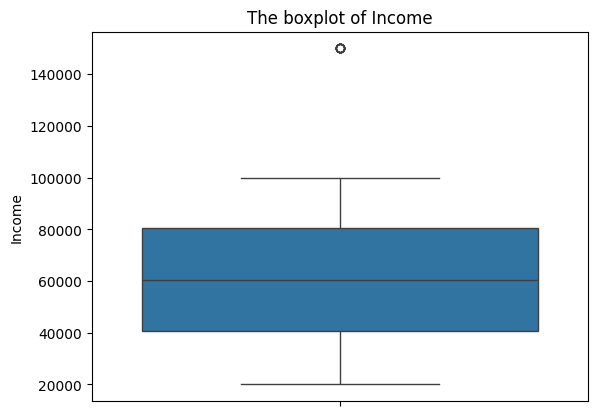

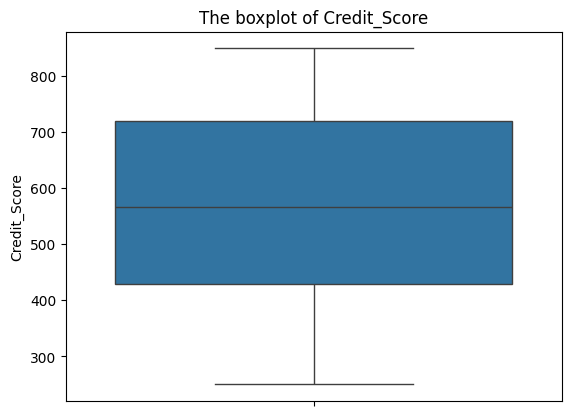

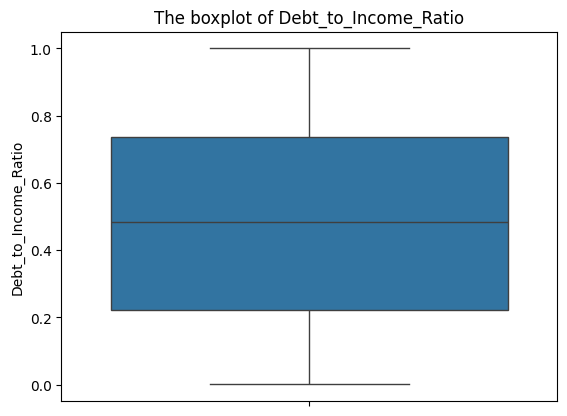

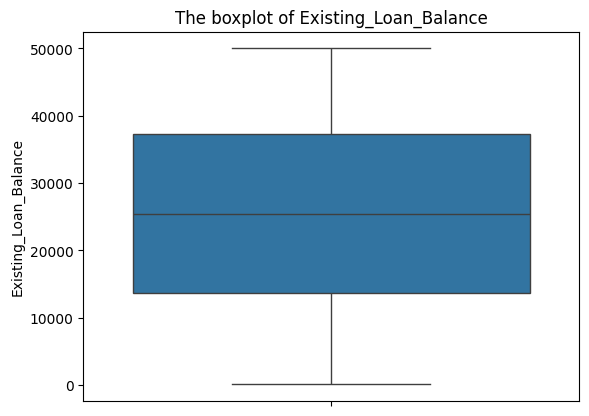

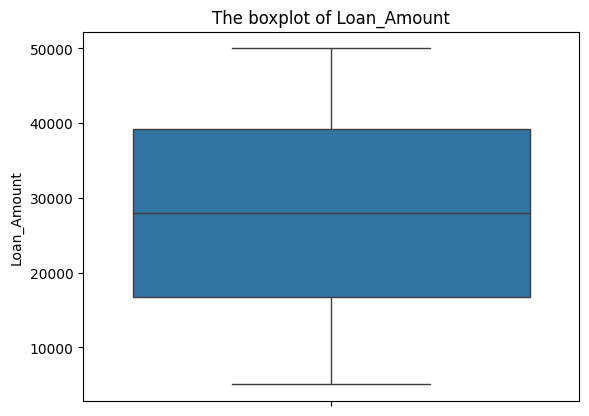

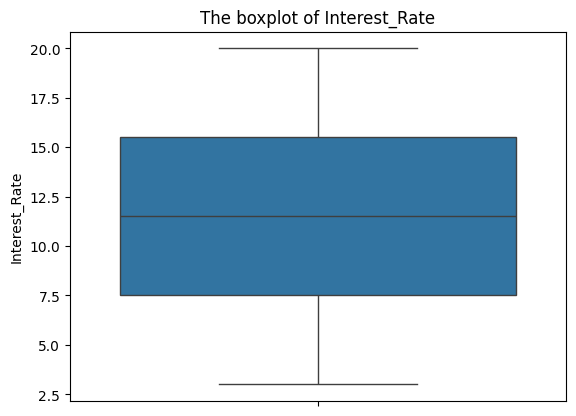

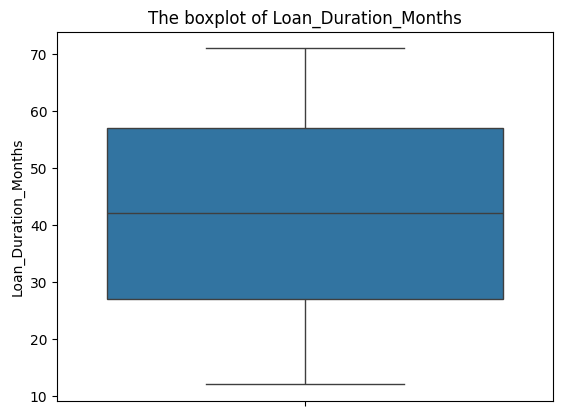

In [28]:
for i in numerical_column:
    sns.boxplot(data[i])
    plt.title(f"The boxplot of {i}")
    plt.show()

## Income box plot

<Axes: ylabel='Income'>

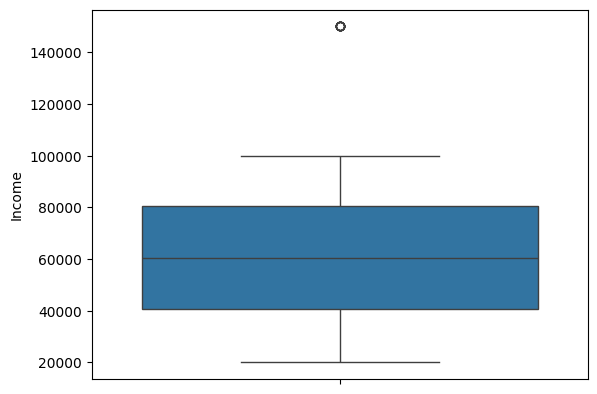

In [29]:
sns.boxplot(data['Income'])

In [30]:
def outlier(data, columns):
    data1 = data.copy()  # Create a copy of the original DataFrame
    for column in columns:
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)
        iqr = q3 - q1
        lower_limit = q1 - (1.5 * iqr)
        upper_limit = q3 + (1.5 * iqr)
        data1 = data1[(data1[column] >= lower_limit) & (data1[column] <= upper_limit)]
    return data1

In [31]:
Cleaned_data = outlier(data,columns=numerical_column)

In [32]:
Cleaned_data

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.11,Employed,Suburban,639,0.007,27060.19,Non-Default,13068.33,18.2,59
1,46,Female,37283.05,Employed,Suburban,474,0.457,40192.99,Default,15159.34,11.7,69
2,32,Male,69567.04,Employed,Urban,750,0.329,25444.26,Default,6131.29,17.0,69
3,60,Female,72016.09,Employed,Rural,435,0.052,3122.21,Non-Default,37531.88,16.9,26
4,25,Female,32161.99,Unemployed,Suburban,315,0.450,19197.35,Non-Default,41466.40,18.9,66
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Female,98081.11,Unemployed,Urban,727,0.962,3586.59,Non-Default,41473.24,3.7,23
996,40,Male,30044.02,Employed,Rural,416,0.775,32993.49,Default,48942.59,12.9,62
997,27,Female,21355.81,Unemployed,Rural,806,0.622,21579.22,Default,34010.25,3.8,55
998,61,Female,81612.66,Employed,Rural,845,0.607,38180.15,Default,17504.01,13.3,27


In [33]:
Cleaned_data.isnull().sum()

Age                      0
Gender                   0
Income                   0
Employment_Status        0
Location                 0
Credit_Score             0
Debt_to_Income_Ratio     0
Existing_Loan_Balance    0
Loan_Status              0
Loan_Amount              0
Interest_Rate            0
Loan_Duration_Months     0
dtype: int64

# Feature Selection

In [34]:
categorical_column = data.select_dtypes(include=['object'])
print(categorical_column.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1000 non-null   object
 1   Employment_Status  1000 non-null   object
 2   Location           1000 non-null   object
 3   Loan_Status        1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None


In [35]:
from scipy.stats import chi2_contingency

In [36]:
grouped_data1 = data.groupby(['Gender', 'Loan_Status']).size().unstack(fill_value=0)
grouped_data1

Loan_Status,Default,Non-Default
Gender,,
Female,122,485
Male,73,320


In [37]:
grouped_data2 = data.groupby(['Employment_Status', 'Loan_Status']).size().unstack(fill_value=0)
grouped_data2

Loan_Status,Default,Non-Default
Employment_Status,,
Employed,135,555
Unemployed,60,250


In [38]:
grouped_data3 = data.groupby(['Location', 'Loan_Status']).size().unstack(fill_value=0)
grouped_data3

Loan_Status,Default,Non-Default
Location,,
Rural,65,283
Suburban,70,274
Urban,60,248


In [39]:
chi2, p, dof, ex = chi2_contingency(grouped_data1)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.5
if p<alpha:
    print("reject null hypo")
else:
    print("accept null")

Chi-Square Statistic: 0.2624601406048746
P-value: 0.6084350207130604
accept null


In [40]:
chi2, p, dof, ex = chi2_contingency(grouped_data2)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.5
if p<alpha:
    print("reject null hypo")
else:
    print("accept null")

Chi-Square Statistic: 0.0
P-value: 1.0
accept null


In [41]:
chi2, p, dof, ex = chi2_contingency(grouped_data3)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.5
if p<alpha:
    print("reject null hypo")
else:
    print("accept null")

Chi-Square Statistic: 0.30770716690215494
P-value: 0.8573975490117258
accept null


# Checking for Target Variable 

In [42]:
data['Loan_Status'].value_counts()

Loan_Status
Non-Default    805
Default        195
Name: count, dtype: int64

1. The target variable has Data Imbalance
   - To solve this:
        a. OverSampling
        b. Undersampling

2. We would prefer oversampling  because it preserves the original distribution of the data and no data loss

3. Use SMOTE oversampling technique to balance the dataset as the data is synthetically generated and no data duplication

# Label Encoding

In [43]:
categorical_column = data.select_dtypes(include=['object'])
print(categorical_column.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             1000 non-null   object
 1   Employment_Status  1000 non-null   object
 2   Location           1000 non-null   object
 3   Loan_Status        1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
None


In [44]:
from sklearn.preprocessing import LabelEncoder
import pickle

#initialize the encoder
le = LabelEncoder()

for i in categorical_column:
    # print(i)
    data[i] = le.fit_transform(data[i])

with open("LabelEncoder.pkl","wb") as file:
    pickle.dump(le, file)

data.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266.11,0,1,639,0.007,27060.19,1,13068.33,18.2,59
1,46,0,37283.05,0,1,474,0.457,40192.99,0,15159.34,11.7,69
2,32,1,69567.04,0,2,750,0.329,25444.26,0,6131.29,17.0,69
3,60,0,72016.09,0,0,435,0.052,3122.21,1,37531.88,16.9,26
4,25,0,32161.99,1,1,315,0.450,19197.35,1,41466.40,18.9,66


# Spliting the Data into Dependent and Independent Variable

In [45]:
y = data['Loan_Status']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    0
998    0
999    1
Name: Loan_Status, Length: 1000, dtype: int64

In [46]:
x = data.drop(columns=['Loan_Status'])
x

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,1,71266.11,0,1,639,0.007,27060.19,13068.33,18.2,59
1,46,0,37283.05,0,1,474,0.457,40192.99,15159.34,11.7,69
2,32,1,69567.04,0,2,750,0.329,25444.26,6131.29,17.0,69
3,60,0,72016.09,0,0,435,0.052,3122.21,37531.88,16.9,26
4,25,0,32161.99,1,1,315,0.450,19197.35,41466.40,18.9,66
...,...,...,...,...,...,...,...,...,...,...,...
995,22,0,98081.11,1,2,727,0.962,3586.59,41473.24,3.7,23
996,40,1,30044.02,0,0,416,0.775,32993.49,48942.59,12.9,62
997,27,0,21355.81,1,0,806,0.622,21579.22,34010.25,3.8,55
998,61,0,81612.66,0,0,845,0.607,38180.15,17504.01,13.3,27


# Standardize the Independent variable

In [47]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

In [48]:
with open("StandardScaler.pkl","wb") as file:
    pickle.dump(scaler, file)

In [49]:
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns= x.columns)
#print 5 rows after scaling
x_scaled_df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,1.112882,1.242791,0.429621,-0.670280,0.049447,0.415800,-1.614947,0.128246,-1.127667,1.364571,0.980752
1,0.371652,-0.804641,-0.952831,-0.670280,0.049447,-0.594522,-0.096248,1.053379,-0.965809,0.033022,1.565263
2,-0.666069,1.242791,0.360501,-0.670280,1.285617,1.095471,-0.528234,0.014413,-1.664643,1.118747,1.565263
3,1.409373,-0.804641,0.460130,-0.670280,-1.186724,-0.833326,-1.463077,-1.558051,0.765981,1.098261,-0.948136
4,-1.184929,-0.804641,-1.161159,1.491914,0.049447,-1.568106,-0.119873,-0.425647,1.070540,1.507969,1.389910


# Split the data into train and test split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_df,y,test_size=0.25,random_state=42)

In [52]:
x_train.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
82,1.557619,-0.804641,-1.439001,-0.670280,-1.186724,0.103518,-0.720602,1.413206,-0.492054,0.155935,1.039203
991,-1.555544,1.242791,-0.640971,1.491914,0.049447,-1.549736,0.625977,-1.333654,0.607616,0.381274,0.454691
789,0.742267,-0.804641,-0.053668,-0.670280,1.285617,0.158627,1.662067,1.478280,-0.482057,1.385056,1.273007
894,0.816390,1.242791,0.392947,-0.670280,0.049447,-0.459813,-1.098589,-0.522707,0.413797,-0.274258,-1.240392
398,0.594021,-0.804641,0.925713,-0.670280,-1.186724,-0.343473,1.024214,1.302102,-1.235282,0.299332,1.565263


In [53]:
y_train.head()

82     1
991    1
789    1
894    1
398    1
Name: Loan_Status, dtype: int64

In [54]:
x_test.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
521,-1.184929,1.242791,0.291408,-0.670280,1.285617,-1.500751,0.123119,0.264210,-0.036074,0.954864,-0.246722
737,-0.221331,-0.804641,1.057155,-0.670280,-1.186724,-0.459813,0.119744,1.400960,0.396354,0.196905,1.448361
740,-0.517823,-0.804641,-0.811924,1.491914,0.049447,-1.170100,-0.757726,-0.974342,0.630002,0.360788,-0.538978
660,-0.221331,-0.804641,-1.255609,-0.670280,-1.186724,1.481230,-1.496826,-0.701432,0.880445,0.606613,-0.538978
411,1.483496,-0.804641,0.346540,-0.670280,1.285617,-0.269995,1.381952,1.050482,-1.666940,-1.359982,-0.889685


In [55]:
y_test.head()

521    1
737    1
740    1
660    0
411    1
Name: Loan_Status, dtype: int64

# Oversampling [SMOTE]

In [56]:
y_train.value_counts()

Loan_Status
1    608
0    142
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,k_neighbors=2)

In [58]:
x_train_reshaped,y_train_reshaped = smote.fit_resample(x_train,y_train)

In [59]:
x_train_reshaped.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,1.557619,-0.804641,-1.439001,-0.670280,-1.186724,0.103518,-0.720602,1.413206,-0.492054,0.155935,1.039203
1,-1.555544,1.242791,-0.640971,1.491914,0.049447,-1.549736,0.625977,-1.333654,0.607616,0.381274,0.454691
2,0.742267,-0.804641,-0.053668,-0.670280,1.285617,0.158627,1.662067,1.478280,-0.482057,1.385056,1.273007
3,0.816390,1.242791,0.392947,-0.670280,0.049447,-0.459813,-1.098589,-0.522707,0.413797,-0.274258,-1.240392
4,0.594021,-0.804641,0.925713,-0.670280,-1.186724,-0.343473,1.024214,1.302102,-1.235282,0.299332,1.565263


In [60]:
y_train_reshaped.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [61]:
y_train_reshaped.value_counts()

Loan_Status
1    608
0    608
Name: count, dtype: int64

# Model Development

## 1. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()

logreg_model.fit(x_train_reshaped,y_train_reshaped)

LogisticRegression()

In [63]:
log_y_pred = logreg_model.predict(x_test)
log_y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1])

### Metrics

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve, auc

In [65]:
log_confusion_matrix = confusion_matrix(y_test,log_y_pred)
print("Logistic Regression Confusion Matrix:")
print(log_confusion_matrix)

Logistic Regression Confusion Matrix:
[[ 29  24]
 [ 82 115]]


In [66]:
log_accuracy_score = accuracy_score(y_test,log_y_pred)
print(f"Logistic Regression Accuracy: {log_accuracy_score}")

Logistic Regression Accuracy: 0.576


## 2. KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [4,5,6,7,8,9,10,11,12,13,14,15,16,17]
model = []
for i in  neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    model.append(knn_model)

print(model)

[KNeighborsClassifier(n_neighbors=4), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=6), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=8), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=11), KNeighborsClassifier(n_neighbors=12), KNeighborsClassifier(n_neighbors=13), KNeighborsClassifier(n_neighbors=14), KNeighborsClassifier(n_neighbors=15), KNeighborsClassifier(n_neighbors=16), KNeighborsClassifier(n_neighbors=17)]


In [68]:
knnModel = []
for i in model:
    models = i.fit(x_train_reshaped,y_train_reshaped)
    knnModel.append(models)
#print(model)
print(knnModel)

[KNeighborsClassifier(n_neighbors=4), KNeighborsClassifier(), KNeighborsClassifier(n_neighbors=6), KNeighborsClassifier(n_neighbors=7), KNeighborsClassifier(n_neighbors=8), KNeighborsClassifier(n_neighbors=9), KNeighborsClassifier(n_neighbors=10), KNeighborsClassifier(n_neighbors=11), KNeighborsClassifier(n_neighbors=12), KNeighborsClassifier(n_neighbors=13), KNeighborsClassifier(n_neighbors=14), KNeighborsClassifier(n_neighbors=15), KNeighborsClassifier(n_neighbors=16), KNeighborsClassifier(n_neighbors=17)]


In [69]:
# Assuming 'model' is a list of trained KNN models
knn_y_pred = []

for i in knnModel:
    knn_model_ypred = i.predict(x_test)
    knn_y_pred.append(knn_model_ypred)

print(knn_y_pred)

[array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1]), array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1

In [70]:
# knnModel # knn_y_pred
# accuracy,confussion_matrix, precision,recall
knn_accuracy_score = []
knn_confusion_matrix = []
knn_precision_score = []
knn_recall_score = []
# Iterate over the models and their corresponding predictions
for i, y_pred in zip(knnModel, knn_y_pred):
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use average='macro' for multiclass
    recall = recall_score(y_test, y_pred, average='macro')        # Use average='macro' for multiclass
    
    knn_accuracy_score.append(acc)
    knn_confusion_matrix.append(conf_matrix)
    knn_precision_score.append(precision)
    knn_recall_score.append(recall)

# Print the results
print("Accuracy Scores: ", knn_accuracy_score)
print("Confusion Matrices: ", knn_confusion_matrix)
print("Precision Scores: ", knn_precision_score)
print("Recall Scores: ", knn_recall_score)


Accuracy Scores:  [0.52, 0.552, 0.464, 0.52, 0.428, 0.512, 0.448, 0.492, 0.428, 0.476, 0.416, 0.452, 0.448, 0.472]
Confusion Matrices:  [array([[ 24,  29],
       [ 91, 106]]), array([[ 19,  34],
       [ 78, 119]]), array([[ 22,  31],
       [103,  94]]), array([[ 20,  33],
       [ 87, 110]]), array([[ 24,  29],
       [114,  83]]), array([[ 21,  32],
       [ 90, 107]]), array([[ 26,  27],
       [111,  86]]), array([[ 23,  30],
       [ 97, 100]]), array([[ 26,  27],
       [116,  81]]), array([[ 24,  29],
       [102,  95]]), array([[ 28,  25],
       [121,  76]]), array([[ 25,  28],
       [109,  88]]), array([[ 32,  21],
       [117,  80]]), array([[ 28,  25],
       [107,  90]])]
Precision Scores:  [0.49694041867954913, 0.4868270332187858, 0.46399999999999997, 0.4780733285406183, 0.45749223602484473, 0.4794866809255298, 0.4754214844002325, 0.48044871794871796, 0.4665492957746479, 0.4783026113671275, 0.4701973553060004, 0.4725939269171384, 0.5034221542959665, 0.49500805152979066

## 3. SVM

In [71]:
from sklearn.svm import SVC

kernel = ['linear','poly','rbf','sigmoid']
svm_model =[]
for i in kernel:
    model = SVC(kernel=i,C=1)
    svm_model.append(model)

# model
print(svm_model)

[SVC(C=1, kernel='linear'), SVC(C=1, kernel='poly'), SVC(C=1), SVC(C=1, kernel='sigmoid')]


In [72]:
svm_Model = []
for i in svm_model:
    models = i.fit(x_train_reshaped,y_train_reshaped)
    svm_Model.append(models)
#print(model)
print(svm_Model)

[SVC(C=1, kernel='linear'), SVC(C=1, kernel='poly'), SVC(C=1), SVC(C=1, kernel='sigmoid')]


In [73]:
# Assuming 'model' is a list of trained KNN models
svm_y_pred = []

for i in knnModel:
    svm_model_ypred = i.predict(x_test)
    svm_y_pred.append(svm_model_ypred)

print(svm_y_pred)

[array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1]), array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1

In [74]:
# knnModel # knn_y_pred
# accuracy,confussion_matrix, precision,recall
svm_accuracy_score = []
svm_confusion_matrix = []
svm_precision_score = []
svm_recall_score = []
# Iterate over the models and their corresponding predictions
for i, y_pred in zip(svm_Model, svm_y_pred):
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use average='macro' for multiclass
    recall = recall_score(y_test, y_pred, average='macro')        # Use average='macro' for multiclass
    
    svm_accuracy_score.append(acc)
    svm_confusion_matrix.append(conf_matrix)
    svm_precision_score.append(precision)
    svm_recall_score.append(recall)

# Print the results
print("Accuracy Scores: ", svm_accuracy_score)
print("Confusion Matrices: ", svm_confusion_matrix)
print("Precision Scores: ", svm_precision_score)
print("Recall Scores: ", svm_recall_score)


Accuracy Scores:  [0.52, 0.552, 0.464, 0.52]
Confusion Matrices:  [array([[ 24,  29],
       [ 91, 106]]), array([[ 19,  34],
       [ 78, 119]]), array([[ 22,  31],
       [103,  94]]), array([[ 20,  33],
       [ 87, 110]])]
Precision Scores:  [0.49694041867954913, 0.4868270332187858, 0.46399999999999997, 0.4780733285406183]
Recall Scores:  [0.4954506273345465, 0.48127573987165984, 0.44612585001436644, 0.46786706254190213]


## 4. Decision Tree

In [75]:
from sklearn.tree import  DecisionTreeClassifier

model = []
criterion = ['gini','entropy']
for i in criterion:
    tree = DecisionTreeClassifier(criterion=i,max_depth=5,random_state=0)
    model.append(tree)

#print(tree)
print(model)

[DecisionTreeClassifier(max_depth=5, random_state=0), DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)]


In [76]:
tree_Model = []
for i in model:
    models = i.fit(x_train_reshaped,y_train_reshaped)
    tree_Model.append(models)
#print(model)
print(tree_Model)

[DecisionTreeClassifier(max_depth=5, random_state=0), DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)]


In [77]:
# Assuming 'model' is a list of trained tree models
tree_y_pred = []

for i in tree_Model:
    tree_model_ypred = i.predict(x_test)
    tree_y_pred.append(tree_model_ypred)

print(tree_y_pred)

[array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1]), array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1

In [88]:
feature_select = tree_Model[0].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': feature_select
})
# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                  feature  importance
4                Location    0.314213
7   Existing_Loan_Balance    0.209863
10   Loan_Duration_Months    0.162178
9           Interest_Rate    0.114410
0                     Age    0.057011
5            Credit_Score    0.051600
8             Loan_Amount    0.032785
2                  Income    0.032028
3       Employment_Status    0.025912
1                  Gender    0.000000
6    Debt_to_Income_Ratio    0.000000


In [78]:
# knnModel # knn_y_pred
# accuracy,confussion_matrix, precision,recall
tree_accuracy_score = []
tree_confusion_matrix = []
tree_precision_score = []
tree_recall_score = []
# Iterate over the models and their corresponding predictions
for i, y_pred in zip(tree_Model, tree_y_pred):
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use average='macro' for multiclass
    recall = recall_score(y_test, y_pred, average='macro')        # Use average='macro' for multiclass
    
    tree_accuracy_score.append(acc)
    tree_confusion_matrix.append(conf_matrix)
    tree_precision_score.append(precision)
    tree_recall_score.append(recall)

# Print the results
print("Accuracy Scores: ", tree_accuracy_score)
print("Confusion Matrices: ", tree_confusion_matrix)
print("Precision Scores: ", tree_precision_score)
print("Recall Scores: ", tree_recall_score)

Accuracy Scores:  [0.496, 0.52]
Confusion Matrices:  [array([[ 22,  31],
       [ 95, 102]]), array([[ 25,  28],
       [ 92, 105]])]
Precision Scores:  [0.47747574063363535, 0.50157444894287]
Recall Scores:  [0.46643041854228523, 0.5023465185327076]


## 5. Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
random_model  = RandomForestClassifier(n_estimators=5,max_depth=6)

In [81]:
random_model.fit(x_train_reshaped,y_train_reshaped)

RandomForestClassifier(max_depth=6, n_estimators=5)

In [82]:
rand_y_pred = random_model.predict(x_test)
rand_y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1])

In [83]:
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_score, recall_score

In [84]:
rand_accuracy = accuracy_score(y_test,rand_y_pred)
print("Random Forest Accuracy:", rand_accuracy)
rand_confusion_matrix = confusion_matrix(y_test,rand_y_pred)
print("random confusion matrix: ")
print(rand_confusion_matrix)
rand_precision = precision_score(y_test,rand_y_pred)
print("Random Forest Precision:", rand_precision)
rand_recall = recall_score(y_test,rand_y_pred)
print("Random Forest recall:", rand_recall)

Random Forest Accuracy: 0.612
random confusion matrix: 
[[ 21  32]
 [ 65 132]]
Random Forest Precision: 0.8048780487804879
Random Forest recall: 0.6700507614213198


# Comparision

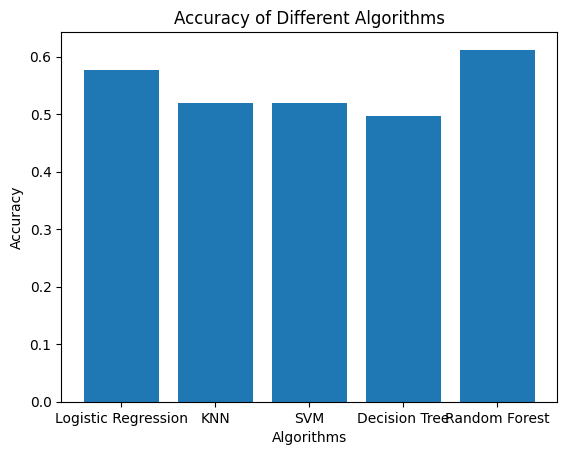

In [87]:
values = [log_accuracy_score,knn_accuracy_score[0],svm_accuracy_score[0],tree_accuracy_score[0],rand_accuracy]
labels = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree','Random Forest']
plt.bar(labels, values)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.show()